# ASSIGNMENT 3

ANWESHA PAUL <br>
MDS202213

### PART A

In [2]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

def display_image(img):
    """Display an image using matplotlib."""
    to_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(to_show)
    plt.axis('off')
    plt.show()

def get_pixel_value(event, x, y, flags, params):
    """Callback function to capture pixel coordinates."""
    if event == cv2.EVENT_LBUTTONDOWN:
        params.append([x, y])
        print(f'Clicked pixel - X: {x}, Y: {y}')

def get_points(img, params):
    """Capture points selected by clicking on the image."""
    cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
    cv2.imshow("Image", img)
    cv2.setMouseCallback('Image', get_pixel_value, param=params)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return params

### OBJECT POINTS

We will generate object points with a grid size of 7x7, considering the checkered pattern has 7 squares in each direction.

In [3]:
# Calculate the number of internal corners per chessboard row and column (7 squares will have 6 internal corners)
num_corners_x = 8 - 1
num_corners_y = 8 - 1

Now, we create the object points based on these dimensions. Since the step size is not given, we'll assume that each square is 1 unit by 1 unit in size. We will calculate the actual step size based on the physical dimensions provided (13.5cm x 14.3cm for the whole board) => each square will be (13.5 / 8)cm x (14.3 / 8)cm in size.

In [4]:
objp_step_x = 13.5 / (num_corners_x + 1)
objp_step_y = 14.3 / (num_corners_y + 1)

objp_step_x, objp_step_y

(1.6875, 1.7875)

In [5]:
# Create a grid for object points
objp = np.zeros(((num_corners_x)*(num_corners_y), 3), np.float32)
objp[:, :2] = np.mgrid[objp_step_x:(num_corners_x+1)*objp_step_x:objp_step_x, objp_step_y:(num_corners_y+1)*objp_step_y:objp_step_y].T.reshape(-1, 2)

print('Object Points:\n', objp)

Object Points:
 [[ 1.6875  1.7875  0.    ]
 [ 3.375   1.7875  0.    ]
 [ 5.0625  1.7875  0.    ]
 [ 6.75    1.7875  0.    ]
 [ 8.4375  1.7875  0.    ]
 [10.125   1.7875  0.    ]
 [11.8125  1.7875  0.    ]
 [ 1.6875  3.575   0.    ]
 [ 3.375   3.575   0.    ]
 [ 5.0625  3.575   0.    ]
 [ 6.75    3.575   0.    ]
 [ 8.4375  3.575   0.    ]
 [10.125   3.575   0.    ]
 [11.8125  3.575   0.    ]
 [ 1.6875  5.3625  0.    ]
 [ 3.375   5.3625  0.    ]
 [ 5.0625  5.3625  0.    ]
 [ 6.75    5.3625  0.    ]
 [ 8.4375  5.3625  0.    ]
 [10.125   5.3625  0.    ]
 [11.8125  5.3625  0.    ]
 [ 1.6875  7.15    0.    ]
 [ 3.375   7.15    0.    ]
 [ 5.0625  7.15    0.    ]
 [ 6.75    7.15    0.    ]
 [ 8.4375  7.15    0.    ]
 [10.125   7.15    0.    ]
 [11.8125  7.15    0.    ]
 [ 1.6875  8.9375  0.    ]
 [ 3.375   8.9375  0.    ]
 [ 5.0625  8.9375  0.    ]
 [ 6.75    8.9375  0.    ]
 [ 8.4375  8.9375  0.    ]
 [10.125   8.9375  0.    ]
 [11.8125  8.9375  0.    ]
 [ 1.6875 10.725   0.    ]
 [ 3.375  10

In [5]:
image_paths = glob.glob('*.jpeg')

# Get image size
img = cv2.imread(image_paths[0])
image_size = (img.shape[1], img.shape[0])

print(image_size)

(1200, 1600)


In [8]:
## Manually getting image correspondences using click and capture:

params = {str(i):[] for i in range(1,11)}

manual_img_points = []
for i in range(len(image_paths)):
    current_path = image_paths[i]
    current_img = cv2.imread(current_path)
    manual_img_points.append(get_points(current_img,str(i+1),params))


x:313, y:458
x:395, y:446
x:477, y:452
x:568, y:455
x:651, y:449
x:740, y:443
x:830, y:431
x:304, y:525
x:386, y:513
x:474, y:516
x:564, y:510
x:645, y:513
x:739, y:501
x:824, y:510
x:301, y:595
x:388, y:592
x:471, y:589
x:555, y:592
x:637, y:583
x:737, y:592
x:823, y:577
x:294, y:656
x:379, y:656
x:470, y:660
x:554, y:660
x:651, y:650
x:730, y:660
x:815, y:660
x:279, y:730
x:372, y:730
x:463, y:724
x:549, y:733
x:639, y:736
x:729, y:733
x:825, y:721
x:273, y:812
x:361, y:812
x:452, y:803
x:546, y:812
x:639, y:809
x:724, y:824
x:824, y:803
x:254, y:879
x:350, y:873
x:448, y:885
x:539, y:879
x:626, y:885
x:730, y:895
x:824, y:889
x:432, y:394
x:502, y:409
x:580, y:421
x:655, y:431
x:739, y:449
x:812, y:461
x:886, y:485
x:410, y:446
x:488, y:479
x:565, y:489
x:639, y:507
x:720, y:513
x:802, y:528
x:877, y:550
x:392, y:516
x:466, y:528
x:545, y:544
x:620, y:571
x:705, y:583
x:776, y:589
x:862, y:608
x:367, y:580
x:442, y:589
x:535, y:617
x:601, y:626
x:682, y:644
x:765, y:666
x:847, y:678

In [18]:
# The same dictionary got appended many times to `manual_img_points`, so the image points for the pattern we are looking for (7x7) are:
manual_img_points_fin =  manual_img_points[0]

In [20]:
# Printing manual image points (using click and capture)
for i in range(1,11):
    print('Image {} points:\n{}'.format(i,manual_img_points_fin[str(i)]))

Image 1 points:
[[313, 458], [395, 446], [477, 452], [568, 455], [651, 449], [740, 443], [830, 431], [304, 525], [386, 513], [474, 516], [564, 510], [645, 513], [739, 501], [824, 510], [301, 595], [388, 592], [471, 589], [555, 592], [637, 583], [737, 592], [823, 577], [294, 656], [379, 656], [470, 660], [554, 660], [651, 650], [730, 660], [815, 660], [279, 730], [372, 730], [463, 724], [549, 733], [639, 736], [729, 733], [825, 721], [273, 812], [361, 812], [452, 803], [546, 812], [639, 809], [724, 824], [824, 803], [254, 879], [350, 873], [448, 885], [539, 879], [626, 885], [730, 895], [824, 889]]
Image 2 points:
[[432, 394], [502, 409], [580, 421], [655, 431], [739, 449], [812, 461], [886, 485], [410, 446], [488, 479], [565, 489], [639, 507], [720, 513], [802, 528], [877, 550], [392, 516], [466, 528], [545, 544], [620, 571], [705, 583], [776, 589], [862, 608], [367, 580], [442, 589], [535, 617], [601, 626], [682, 644], [765, 666], [847, 678], [345, 635], [426, 647], [505, 672], [576, 

### PART B

In [30]:
def refine_chessboard_corners(image_paths, objp):
    # Criteria for corner refinement
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

    # Lists to store object points and image points
    objpoints = []
    imgpoints = []

    # Loop through each image
    for fname in image_paths:
        # Read the image and convert it to grayscale
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (7, 7), None)

        if ret:
            # Refine corner positions
            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria=criteria)

            # Append object points and refined image points
            objpoints.append(objp)
            imgpoints.append(corners2)

            # Visualize refined corners on the image
            cv2.drawChessboardCorners(img, (7, 7), corners2, ret)
            display_image(img)
        else:
            print('Corners not found for image at', fname)

    return objpoints, imgpoints

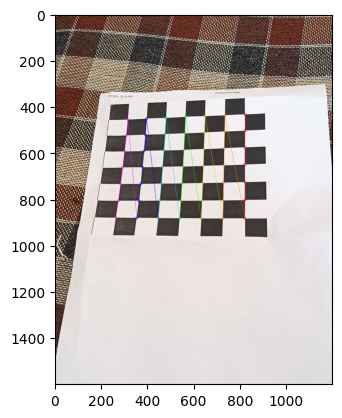

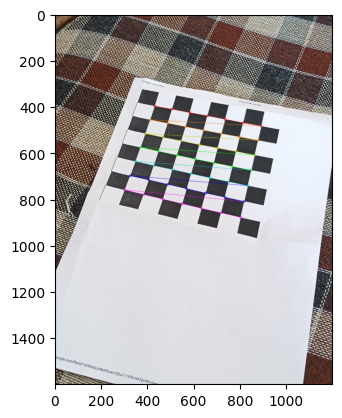

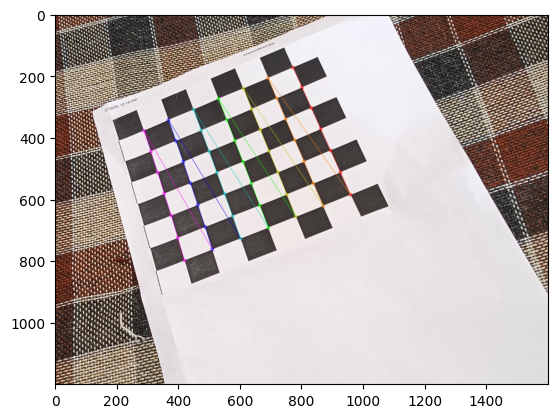

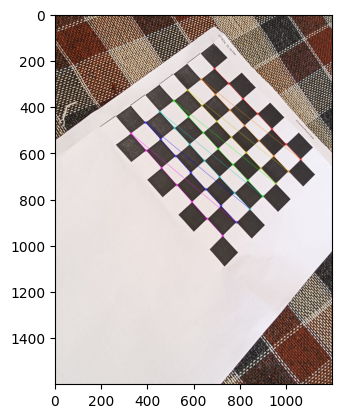

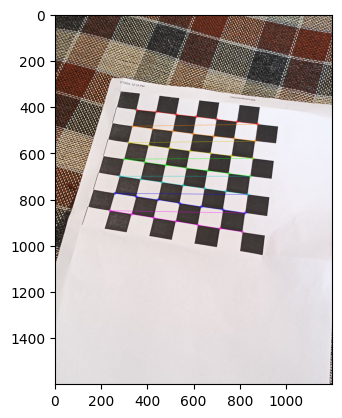

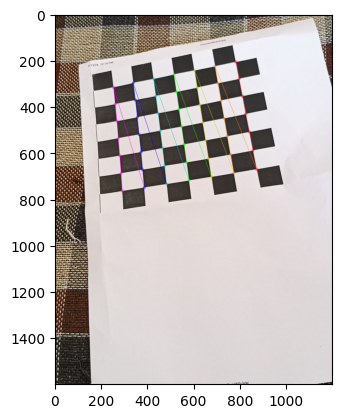

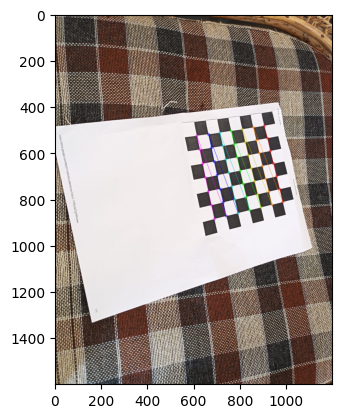

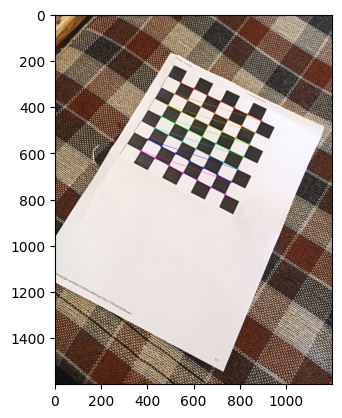

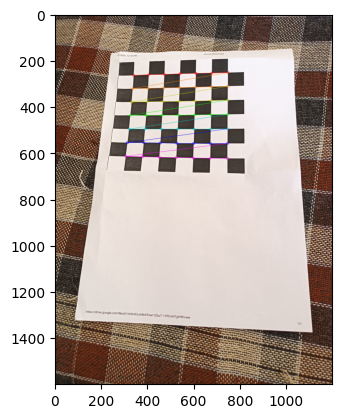

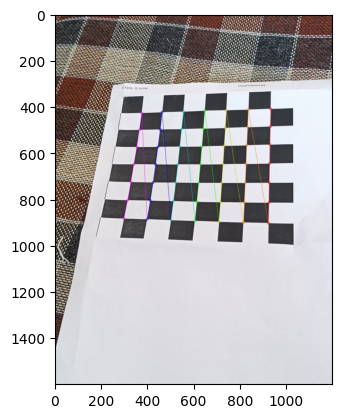

In [32]:
objpoints, imgpoints = refine_chessboard_corners(image_paths,objp)

### PART C

In [33]:
def calibrate_camera(obj_points, img_points, image_size):
    # Calibrate the camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, image_size, None, None)
    
    return mtx, dist, rvecs, tvecs

# Function to print matrices with float formatting to 4 decimal places
def print_matrices_with_format(matrix, title):
    """Print matrices with float formatting to 4 decimal places."""
    print(title + ":")
    for row in matrix:
        row_str = "(" + " ".join(["%.4f" % elem for elem in row]) + ")"
        print(row_str)

In [34]:
# Calibrate camera
mtx, dist, rvecs, tvecs = calibrate_camera(objpoints, imgpoints, image_size)

print_matrices_with_format(mtx, "Intrinsic camera matrix")

Intrinsic camera matrix:
(3005.5319 0.0000 -71.1469)
(0.0000 3428.5188 796.9925)
(0.0000 0.0000 1.0000)


In [35]:
print_matrices_with_format(dist, "Lens distortion parameters")

Lens distortion parameters:
(1.8443 -13.2603 -0.0836 -0.1048 43.3843)


### PART D

In [36]:
def calculate_reprojection_error(obj_points, img_points, mtx, dist, rvecs, tvecs):
    """Calculate the mean reprojection error"""
    mean_error = 0
    
    for i in range(len(obj_points)):
        # Project object points to image plane
        img_points_reproj, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], mtx, dist)
        
        # Calculate the reprojection error
        error = cv2.norm(img_points[i], img_points_reproj, cv2.NORM_L2) / len(img_points_reproj)
        mean_error += error

    mean_error /= len(obj_points)
    return mean_error

In [39]:
# Calculate reprojection error
reprojection_error = calculate_reprojection_error(objpoints, imgpoints, mtx, dist, rvecs, tvecs)

reprojection_error

0.28847640332247576

**REMARKS**: A reprojection error of 0.2884 is a reasonable value and suggests that the camera calibration was successful in estimating the camera parameters accurately.